In [1]:
import pandas as pd
import numpy as np

df_train_x = pd.read_csv("X_train.csv", header=None)
df_train_y = pd.read_csv("y_train.txt", header=None, names=["label"])
# read txt
df_test_x = pd.read_csv("X_test.csv", header=None)
df_test_y = pd.read_csv("y_test.txt", header=None, names=["label"])



In [2]:
# print shape
print("Train X shape:", df_train_x.shape)
print("Train y shape:", df_train_y.shape)
print("Test X shape:", df_test_x.shape)
print("Test y shape:", df_test_y.shape)

Train X shape: (7352, 561)
Train y shape: (7352, 1)
Test X shape: (2947, 561)
Test y shape: (2947, 1)


In [3]:
x_test = df_test_x.to_numpy()
x_train = df_train_x.to_numpy()
# 把它變成一維
y_test = df_test_y.to_numpy().astype(int).ravel() 
y_train = df_train_y.to_numpy().astype(int).ravel() 

print("\n--------------new------------\n")
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)



--------------new------------

x_train: (7352, 561)
y_train: (7352,)
x_test: (2947, 561)
y_test: (2947,)


- 先來做做看knn

In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

k_values = list(range(1, 21, 2))
mean_accuracies = []

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)

for k in k_values:
    pipe = Pipeline([
        ("knn", KNeighborsClassifier(
            n_neighbors=k
        ))
    ])

    scores = cross_val_score(
        pipe,
        x_train, # 使用 LDA 後的資料
        y_train,
        cv=cv,
        scoring="accuracy"
    )

    mean_accuracies.append(scores.mean())
    print(f"k={k:2d}, Accuracy={scores.mean()}")

best_k = k_values[np.argmax(mean_accuracies)]
print("Best k =", best_k)


k= 1, Accuracy=0.9719794484755152
k= 3, Accuracy=0.9673548930109093
k= 5, Accuracy=0.9650423378052786
k= 7, Accuracy=0.9615055702770571
k= 9, Accuracy=0.9593301793865064
k=11, Accuracy=0.9593298094220695
k=13, Accuracy=0.9567449603906825
k=15, Accuracy=0.955249101680101
k=17, Accuracy=0.9544329601317072
k=19, Accuracy=0.954025074339729
Best k = 1


- 這邊k = 1 還不錯，試試看test sample

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
# 做knn 這邊k = 1
final_pipe = Pipeline([
    ("knn", KNeighborsClassifier(
        n_neighbors = best_k,
    ))
])


final_pipe.fit(x_train, y_train)


y_pred = final_pipe.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("-" * 30)
print(f"測試集 (Test Set) 辨識正確率: {test_accuracy}")



------------------------------
測試集 (Test Set) 辨識正確率: 0.8785205293518833


- 感覺test set也還不錯 
- knn感覺就還不錯了

In [7]:
# 做knn 這邊k = 1
final_pipe = Pipeline([
    ("knn", KNeighborsClassifier(
        n_neighbors = 20,
    ))
])


final_pipe.fit(x_train, y_train)


y_pred = final_pipe.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("-" * 30)
print(f"測試集 (Test Set) 辨識正確率: {test_accuracy}")



------------------------------
測試集 (Test Set) 辨識正確率: 0.9043094672548354


- 這邊用20反而提升了 這樣好像比較好一點可能是因為train sample分得很好
- 但是在test sample反而因為可能太過接近反而長不好，所以當k = 20時反而準確度上升

<hr>

- 先看看用標準化後再做

In [8]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler   

k_values = list(range(1, 21, 2))
mean_accuracies = []

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)

for k in k_values:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(
            n_neighbors=k
        ))
    ])

    scores = cross_val_score(
        pipe,
        x_train, # 使用 LDA 後的資料
        y_train,
        cv=cv,
        scoring="accuracy"
    )

    mean_accuracies.append(scores.mean())
    print(f"k={k:2d}, Accuracy={scores.mean()}")

best_k = k_values[np.argmax(mean_accuracies)]
print("Best k =", best_k)


k= 1, Accuracy=0.9649061908924004
k= 3, Accuracy=0.960146598408228
k= 5, Accuracy=0.9596017332833882
k= 7, Accuracy=0.9574251400084167
k= 9, Accuracy=0.9540239644464176
k=11, Accuracy=0.952936823947798
k=13, Accuracy=0.9530723234229109
k=15, Accuracy=0.9484482304138515
k=17, Accuracy=0.9480393272196709
k=19, Accuracy=0.9469511693188494
Best k = 1


In [9]:
# 做knn 這邊k = 1
final_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors = best_k,
    ))
])


final_pipe.fit(x_train, y_train)


y_pred = final_pipe.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("-" * 30)
print(f"測試集 (Test Set) 辨識正確率: {test_accuracy}")



------------------------------
測試集 (Test Set) 辨識正確率: 0.8537495758398371


In [10]:
# 做knn 這邊k = 1
final_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors = 20,
    ))
])


final_pipe.fit(x_train, y_train)


y_pred = final_pipe.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("-" * 30)
print(f"測試集 (Test Set) 辨識正確率: {test_accuracy}")



------------------------------
測試集 (Test Set) 辨識正確率: 0.8876823888700374


- 下降了一點
- 感覺不用做標準化

<hr>
<hr>

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 設定交叉驗證策略
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)

# 建立 Pipeline
# LDA 不需要像 KNN 那樣調整 k 值，通常直接使用預設參數即可
pipe = Pipeline([
    ("lda", LinearDiscriminantAnalysis())
])

# 執行交叉驗證 (Cross Validation)
scores = cross_val_score(
    pipe,
    x_train, # 這裡放入您的訓練資料
    y_train,
    cv=cv,
    scoring="accuracy"
)

# 輸出結果
print(f"Accuracy per fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

Accuracy per fold: [0.98232495 0.97960571 0.98027211 0.98163265 0.98163265]
Mean Accuracy: 0.9811


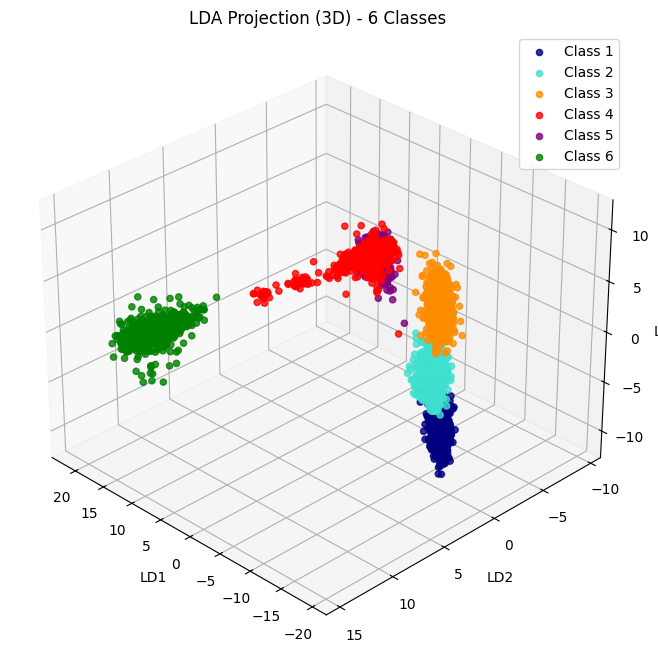

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 檢查類別數量
n_classes = len(np.unique(y_train))


if n_classes >= 4:
    # 1. 設定 LDA 為 3 個分量
    lda_vis = LinearDiscriminantAnalysis(n_components=3)
    x_r = lda_vis.fit_transform(x_train, y_train)

    # 2. 建立 3D 圖表
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d') # 設定投影模式為 3d

    # 設定顏色 
    colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple', 'green']
    
    # 取得所有類別標籤
    unique_classes = np.unique(y_train)

    # 3. 迴圈繪製每一類的點
    for color, i in zip(colors, unique_classes):
        # 篩選出該類別的點
        ax.scatter(x_r[y_train == i, 0], # LD1
                   x_r[y_train == i, 1], # LD2
                   x_r[y_train == i, 2], # LD3
                   alpha=0.8, 
                   c=color,
                   label=f"Class {i}")

    # 4. 設定標籤與標題
    ax.set_title(f'LDA Projection (3D) - {n_classes} Classes')
    ax.set_xlabel('LD1')
    ax.set_ylabel('LD2')
    ax.set_zlabel('LD3')
    ax.legend(loc='best')
    
    # 調整視角 (可選，elevation=仰角, azimuth=方位角)
    ax.view_init(elev=30, azim=135) 
    
    plt.show()


- 因為有六類所以最多6-1 = 5

In [13]:
# 做knn 這邊k = 1
final_pipe = Pipeline([
    ("lda", LinearDiscriminantAnalysis())
])


final_pipe.fit(x_train, y_train)


y_pred = final_pipe.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("-" * 30)
print(f"測試集 (Test Set) 辨識正確率: {test_accuracy}")



------------------------------
測試集 (Test Set) 辨識正確率: 0.9633525619273838


- 從上面的圖形來看確實是還可以接受的

<hr>
<hr>

- lasso regression

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)




cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)
C_values = np.logspace(-3, 1, 10)
mean_accuracies = []

for C in C_values:
    print('parameter:', C)
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(
            penalty="l1", # 這一行會變成lasso regression
            solver="liblinear", # 這邊有另一個saga但是我不太確定兩者差別好像是一個適合大樣本一個適合小樣本
                                # 但是因為假如用saga會花很多時間我不太確定是為什麼我就先用liblinear了
                                # 其實我這邊很好奇為什麼用saga太花時間一個cv就要跑五分鐘以上感覺是我電腦爛嗎
                                # 還是有數學上的原因
            C=C,
            max_iter=5000        
        ))
    ])

    scores = cross_val_score(
        pipe,
        x_train,
        y_train,
        cv=cv,
        scoring="accuracy"
    )

    mean_accuracies.append(scores.mean())
    print(f"C={C:.4f}, Accuracy={scores.mean():.4f}")

best_C = C_values[np.argmax(mean_accuracies)]
print("Best C =", best_C)


parameter: 0.001
C=0.0010, Accuracy=0.6613
parameter: 0.0027825594022071257
C=0.0028, Accuracy=0.8939
parameter: 0.007742636826811269
C=0.0077, Accuracy=0.9264
parameter: 0.021544346900318832
C=0.0215, Accuracy=0.9592
parameter: 0.05994842503189409
C=0.0599, Accuracy=0.9744
parameter: 0.1668100537200059
C=0.1668, Accuracy=0.9830
parameter: 0.46415888336127775
C=0.4642, Accuracy=0.9861
parameter: 1.2915496650148828
C=1.2915, Accuracy=0.9861
parameter: 3.593813663804626
C=3.5938, Accuracy=0.9846
parameter: 10.0
C=10.0000, Accuracy=0.9839
Best C = 0.46415888336127775


In [20]:
best_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        penalty="l1",
        solver="liblinear",  # 跟你 CV 時保持一致
        C=best_C,
        max_iter=5000
    ))
])
best_pipe.fit(x_train, y_train)




,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.46415888336127775


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_pipe.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9582626399728538

Classification Report:

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.97      0.95      0.96       471
           3       1.00      0.97      0.98       420
           4       0.97      0.86      0.91       491
           5       0.89      0.97      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



- 這邊可以看到效果其實也還不錯

<hr>
<hr>

- 換成svm

- 先來試試看linear的

In [22]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # SVM 對特徵縮放非常敏感，建議加入
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# 維持原本的 CV 設定
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)

In [23]:
# 設定 C 的測試範圍 (通常是指數級距，如 0.01, 0.1, 1, 10...)
C_values = [1, 5, 10, 50, 100]
mean_accuracies_linear = []

print("--- Linear SVM Tuning ---")

for C in C_values:
    pipe_linear = Pipeline([
        ("scaler", StandardScaler()), 
        ("svm", SVC(kernel='linear', C=C))
    ])

    scores = cross_val_score(
        pipe_linear,
        x_train, 
        y_train,
        cv=cv,
        scoring="accuracy"
    )

    mean_accuracies_linear.append(scores.mean())
    print(f"C={C}, Accuracy={scores.mean():.4f}")

best_C = C_values[np.argmax(mean_accuracies_linear)]
print(f"Best C for Linear SVM = {best_C}")

--- Linear SVM Tuning ---
C=1, Accuracy=0.9818
C=5, Accuracy=0.9805
C=10, Accuracy=0.9797
C=50, Accuracy=0.9799
C=100, Accuracy=0.9799
Best C for Linear SVM = 1


In [ ]:
best_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel='linear', C=C))
])
best_pipe.fit(x_train, y_train)


,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,100
,kernel,'linear'
,degree,3
,gamma,'scale'


In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_pipe.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))




Test Accuracy: 0.9596199524940617


- 可以發現不用nonlinear的其實效果就還不錯

<hr>

- 現在來試試看nonlinaer

In [31]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])


param_grid = {
    "svm__C": [1, 10, 50 , 100],
    "svm__gamma": [0.001, 0.01, 0.1, 1 , 10 , 50 , 100]
}


cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1   # 這好像能讓cpu多用在這 加速用
)

grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)





Best parameters: {'svm__C': 50, 'svm__gamma': 0.001}
Best CV accuracy: 0.9861261486239634


- 這邊選0.001效果最好，代表太複雜反而不好
- 然後c最好的是50
- 這樣感覺0.001是蠻平滑的

In [32]:
best_model = grid.best_estimator_

from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9582626399728538

Classification Report:

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       496
           2       0.93      0.96      0.95       471
           3       0.98      0.92      0.95       420
           4       0.97      0.89      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



- 這邊效果也很好
- 但是或許還有其他參數可以表現更好但光上面這些參數我就跑了10分鐘
- 不過他比linear低一點點
- 有可能是這個資料並不需要這麼複雜簡單一點就好

<hr>
<hr>

- 先來試試看一棵樹 decison tree

他可以選以下參數

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 建立模型時直接設定參數
dt_model = DecisionTreeClassifier(
    min_samples_split=20,  # R: minsplit=20
    min_samples_leaf=1,    # R: minbucket=1
    max_depth=2,           # R: maxdepth=2
    ccp_alpha=0.0,         # R: cp=0 (Python 預設就是 0，不剪枝)
    random_state=42        # 固定隨機種子，確保結果一致
)

# 訓練模型
dt_model.fit(x_train, y_train)

In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. 設定 CV 方式 (跟之前一樣)
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=20
)

# 2. 定義要測試的「參數網格」
# 我們把所有想測的數值都放進去
param_grid = {
    # 對應 R 的 maxdepth
    'max_depth': [2, 4, 6, 8, 10, None], 
    
    # 對應 R 的 minsplit (節點最少樣本數)
    # 測試 2(預設), 10, 20(你圖中的值), 50
    'min_samples_split': [2, 10, 20, 50], 
    
    # 對應 R 的 minbucket (葉節點最少樣本數)
    # 測試 1(預設), 5, 10
    'min_samples_leaf': [1, 5, 10],

    # 對應 R 的 cp (複雜度參數)
    # Python 預設是 0，可以多測一點點
    'ccp_alpha': [0.0, 0.01, 0.02]
}

# 3. 建立模型與搜尋器
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy', # 評估標準
    n_jobs=-1,          # 使用所有 CPU 核心加速
    verbose=1           # 顯示進度
)

# 4. 開始訓練 (這會跑比較久，因為要測所有組合)
print("正在搜尋最佳參數組合...")
grid_search.fit(x_train, y_train)

# 5. 顯示結果
print("\n--- 搜尋結果 ---")
print(f"最佳準確率: {grid_search.best_score_:.4f}")
print("最佳參數組合:")
print(grid_search.best_params_)

# 取得最佳模型
best_tree_model = grid_search.best_estimator_

正在搜尋最佳參數組合...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

--- 搜尋結果 ---
最佳準確率: 0.9412
最佳參數組合:
{'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


- 把樹畫出來看看

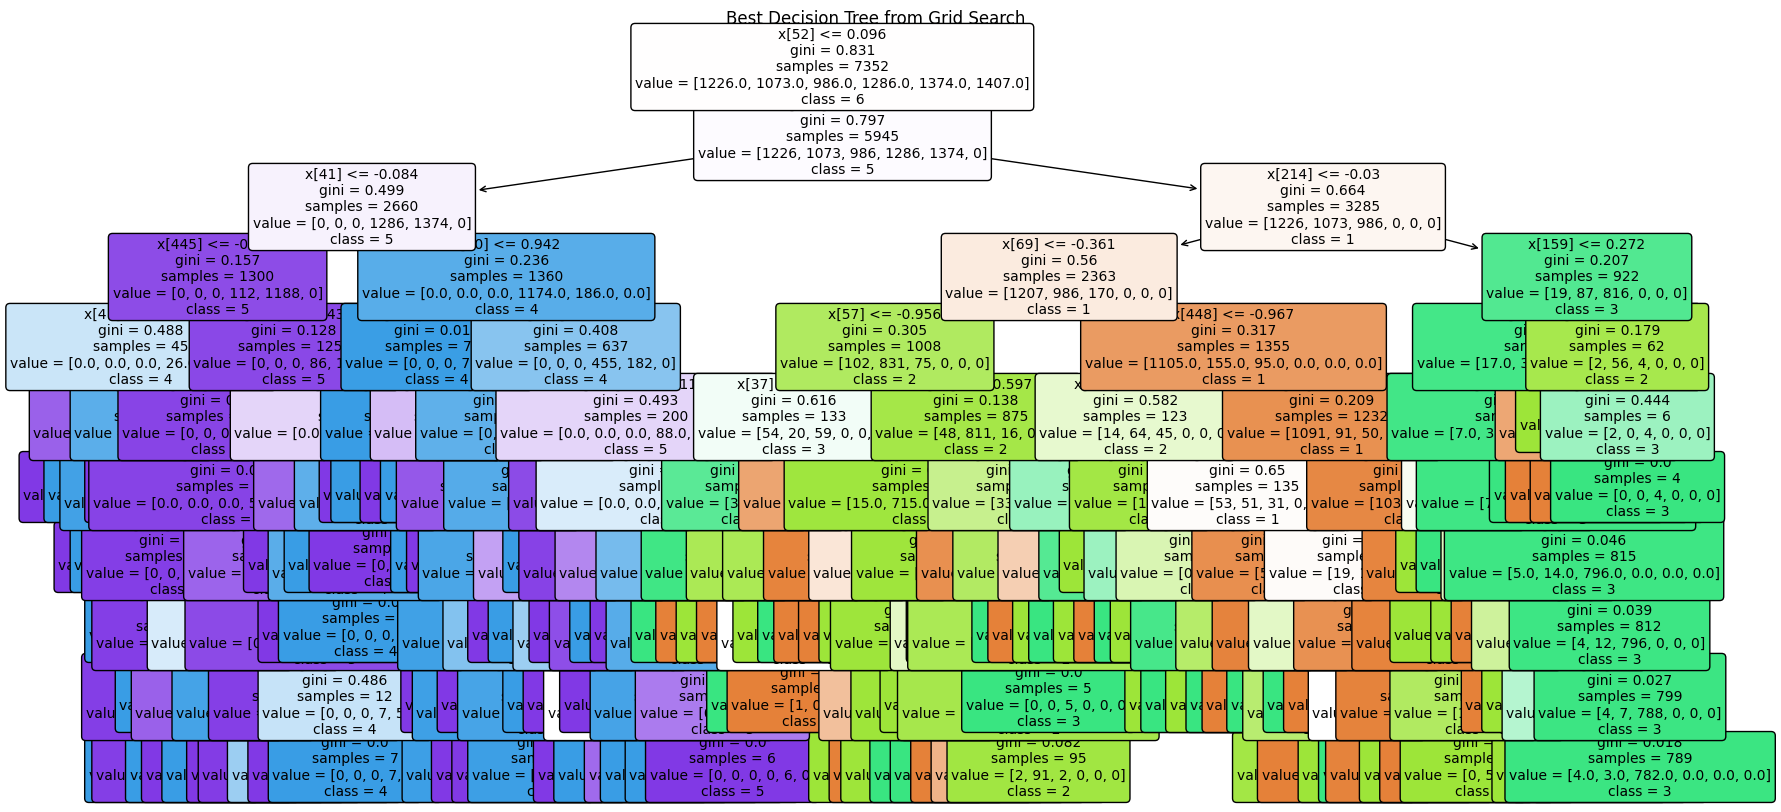

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree_model, 
    filled=True, 
    feature_names=None,  
    class_names=best_tree_model.classes_.astype(str), 
    rounded=True,
    fontsize=10
)
plt.title("Best Decision Tree from Grid Search")
plt.show()

- 但這邊其實也看不出什麼因為我不太知道各個變數的含義

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. 使用最佳模型進行預測
y_pred = best_tree_model.predict(x_test)

# 2. 計算準確率 (Accuracy)
acc = accuracy_score(y_test, y_pred)
print(f"Testing Set Accuracy: {acc:.4f}")


# 4. (選用) 詳細報表

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

Testing Set Accuracy: 0.8565

--- Classification Report ---
              precision    recall  f1-score   support

           1       0.78      0.92      0.84       496
           2       0.81      0.70      0.75       471
           3       0.84      0.79      0.81       420
           4       0.88      0.79      0.84       491
           5       0.83      0.90      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.85      0.85      2947
weighted avg       0.86      0.86      0.86      2947



- 可以看到其實沒有前面幾個理想或許是我選的參數不夠好，或許其他參數更好

<hr>
<hr>

- 來試看看多棵樹

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold



# 1. 設定參數網格

param_grid = {
    'n_estimators': [100, 200],      # 試試看 100 棵樹或 200 棵樹
    'max_depth': [10, 20, None],     # 限制深度，None 代表不限制
    'max_features': ['sqrt', 'log2'], # 每次分裂隨機選取的特徵數量
    'min_samples_leaf': [1, 5]       # 葉節點最小樣本數
}

# 2. 建立模型
# n_jobs=-1 非常重要！它會用你電腦所有的核心平行運算，速度快很多
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

# 3. 建立 CV 搜尋器
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


grid_rf.fit(x_train, y_train)

# 4. 輸出結果
print(f"\n最佳準確率 (CV): {grid_rf.best_score_:.4f}")
print("最佳參數:", grid_rf.best_params_)

# 取得最佳模型
best_rf_model = grid_rf.best_estimator_
print(f"OOB Score: {best_rf_model.oob_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

最佳準確率 (CV): 0.9830
最佳參數: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}
OOB Score: 0.9812


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 使用最佳模型對 "測試集 (Test Set)" 進行預測
y_pred = best_rf_model.predict(x_test)

# 2. 計算測試集準確率 (Test Accuracy)
test_acc = accuracy_score(y_test, y_pred)
print(f"Testing Set Accuracy: {test_acc:.4f}")

# 比較 CV 分數與 Test 分數
print(f"Validation Score (CV): {grid_rf.best_score_:.4f}")
print(f"差值 (Overfitting check): {grid_rf.best_score_ - test_acc:.4f}")


# 3. 顯示詳細分類報表 (Precision, Recall, F1-score)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


Testing Set Accuracy: 0.9386
Validation Score (CV): 0.9830
差值 (Overfitting check): 0.0444

--- Classification Report ---
              precision    recall  f1-score   support

           1       0.91      0.97      0.94       496
           2       0.88      0.94      0.91       471
           3       0.96      0.83      0.89       420
           4       0.96      0.90      0.93       491
           5       0.92      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.94      0.94      2947



- 可以看到這邊效果就會比一棵樹的時候好很多
- 就跟老師上課的時候談論的一樣
- 可以想成ＣＴＬ

##### 結論：
- 我這邊都沒有用pca做資料的處理
- 但是其實在各種方式效果都蠻不錯的
- 但是或許加上pca或其他方式後做出來的效果更好，只是時間有點趕只能先做成這樣
- 但其實這樣做有點像是黑盒子就你把套件帶入得出結果，假如上課沒有上還真的會不知道這些在幹嘛的